Для интернет-магазина, который продаёт по всему миру компьютерные игры, необходимо спланировать закуп на следующий год и разработать рекламные кампании.
Проанализируем доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности.
Отчет и прогнозы будут переданы в отдел маркетинга для дальнейших действий

<b> Описание данных: </b> 
<br>Name — название игры
<br>Platform — платформа
<br>Year_of_Release — год выпуска
<br>Genre — жанр игры
<br>NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br>EU_sales — продажи в Европе (миллионы проданных копий)
<br>JP_sales — продажи в Японии (миллионы проданных копий)
<br>Other_sales — продажи в других странах (миллионы проданных копий)
<br>Critic_Score — оценка критиков (максимум 100)
<br>User_Score — оценка пользователей (максимум 10)
<br>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from scipy import stats as st
import seaborn as sns

Импорт необходимых нам библиотек

In [2]:
games_clean = pd.read_csv('/datasets/games.csv')
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сразу же видно, что необходима предобработка данных. В первых 5 строках датасета есть пропуски в столбцах Rating, User_Score (причем в столбце Critic_Score количество пропусков чуть ли не равна половине всей длины столбца). Помимо этого, названия столбцы нужно привести к единому регистру. Также год релиза указан в формате float. 

### Шаг 2. Предобработка данных

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
for column_name in ["name", "platform", 'genre']:
    games[column_name] = games[column_name].str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия столбцов приведены к нижнему регистру

In [7]:
print('Пропусков в столбце год релиза:', games['year_of_release'].isna().sum())
print('Пропусков в столбце оценка критиков:', games['critic_score'].isna().sum())
print('Пропусков в столбце оценка пользователей:', games['user_score'].isna().sum())
print('Пропусков в столбце рейтинг:', games['rating'].isna().sum())

Пропусков в столбце год релиза: 269
Пропусков в столбце оценка критиков: 8578
Пропусков в столбце оценка пользователей: 6701
Пропусков в столбце рейтинг: 6766


Пропусков в столбце года релиза игр не так уж и много. В районе 1.5%. С пропусками в рейтинге, оценке критиков и пользователей дела обстоят иначе - слишком большое количество пропусков. Нужно разобраться детальнее

In [8]:
games.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в этих столбцах никак не зависят от платформы и года релиза. Предположение о том, что оценки и рейтинг отсутствует только у игр на определенной платформе или преимущественно у старых игр, отклоняется. 

Заполнять пропуски средним или медианным значением, даже если сортировать их по жанрам или году выпуска, будет неверным. Бывают разные игры и давать им усредененный рейтинг или оценки неправильно. Возможно, к отсутствию данных в этих столбцах привела непопулярность данных игр.

Количество пропусков в столбцах огромное, но работать с данным нам нужно, поэтому нужно заполнить их числовым значением, которое не "примкнуло" бы к тем значениям, которые по сути своей отражают объективную действительность. Поэтому заполним пропуски в столбцах оценок на "-1". Такого значнения среди уникальных в этих столбцах нет.

Согласно информации поисковиков, TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Поэтому оценку tbd необходимо заменить на NaN, потому что решение по ним не принято, а следовательно оценки никакой быть не может. 

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan


In [10]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
print('Количество пропусков в столбце оценки критиков:', games['critic_score'].isna().sum())
print('Количество пропусков в столбце оценки пользователей:', games['user_score'].isna().sum())

Количество пропусков в столбце оценки критиков: 0
Количество пропусков в столбце оценки пользователей: 0


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеются 2 пропуска в столбцах name, genre, и около 2.5 тысяч пропусков в годе релиза, а также нужно изменить тип данных в user_score, year_of_release. 2 строки с пропущенными данными - это мизер от общего количества, поэтому избавляемся.

In [12]:
print('Процент пропусков в столбцах name и genre составляет:', round((2/16713), 4),'%')


Процент пропусков в столбцах name и genre составляет: 0.0001 %


Процент пропусков в столбцах name и genre составляет: 0.0001%. Это менее 10%, а значит удаление этих данных можно считать приемлемым. 

In [13]:
games = games.dropna(subset=['name','genre']) 

In [14]:
games['year_of_release'] = games['year_of_release'].fillna(2999)


2999-й год для игр, где дата релиза не указана. Чтобы проще было отличить то, что мы заполнили сами от имевшихся изначально данных. Теперь приступим к обработки типов данных

In [15]:
games['user_score'] = games['user_score'].astype('float')
games['year_of_release'] = games['year_of_release'].astype('int')


In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 

In [17]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [18]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,28.31


### Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

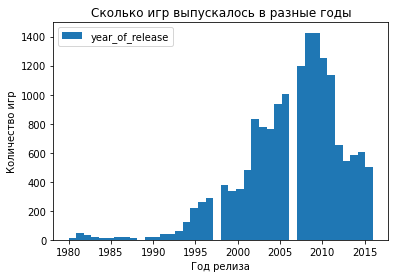

In [19]:
games_filtered = games.query('year_of_release != 2999')
plot_years = games_filtered['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Сколько игр выпускалось в разные годы')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plot_years

Как мы видим, до 95-го года количество выпускаемых игр было крайне малым. С нарастанием вычислительных мощностей и, в целом, с развитием железа, наблюдался и рост игр, которые выпускались по годам. Пик пришелся на 2008 год, а затем начался спад. Возможно, это связано с развитием высокоскоростного интернета, который позволил создать многопользовательские онлайн игры, которые остаются популярными многие годы, и конкурировать с ними крайне сложно, и приходится придумывать что-то инновационное. А на это нужно время. Таково мое предположение о спаде выпуска игр после 2010 года

#### Посмотрите, как менялись продажи по платформам

<AxesSubplot:title={'center':'Суммарные продажи по платформам'}, xlabel='Количество', ylabel='platform'>

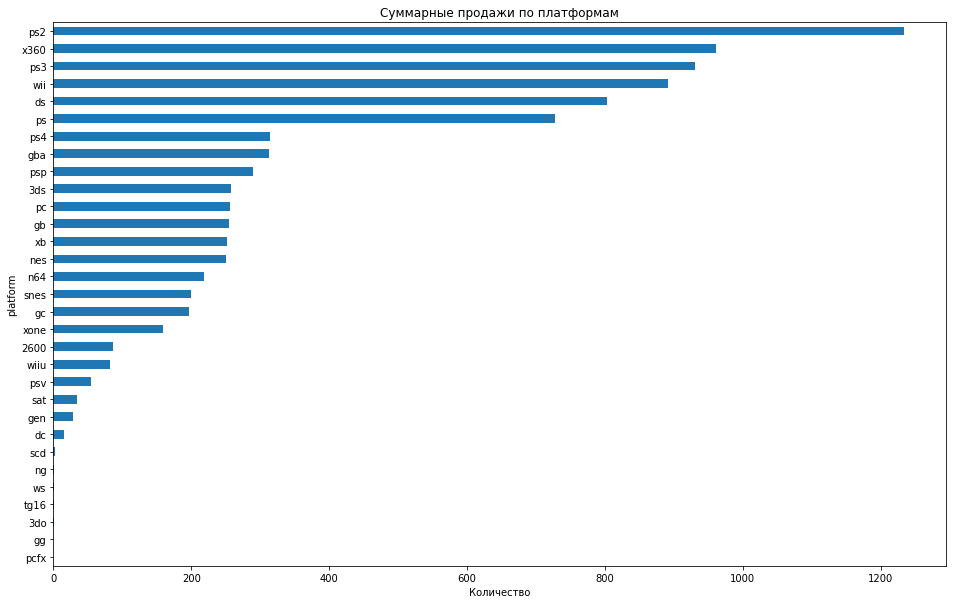

In [20]:
plot_platform_sales = games_filtered.groupby('platform')['total_sales'].sum().sort_values()
plt.title('Суммарные продажи по платформам')
plt.xlabel('Количество')
plot_platform_sales.plot(kind='barh', figsize = (16, 10))

In [21]:
top_platforms = pd.pivot_table(games_filtered, index='platform',values='total_sales', aggfunc='sum')
top_platforms.sort_values(by='total_sales', ascending=False).head(11)



,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [22]:
top_platforms_filter = ['ps2','x360','ps3','wii','ds','ps'] 
top_platforms_filtered = games_filtered.query('platform == @top_platforms_filter')

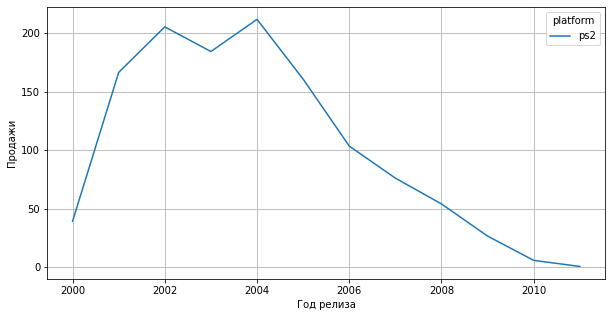

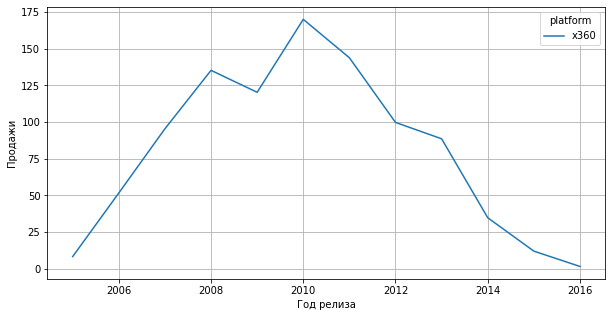

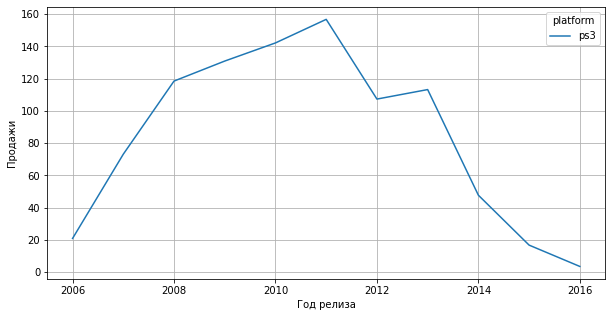

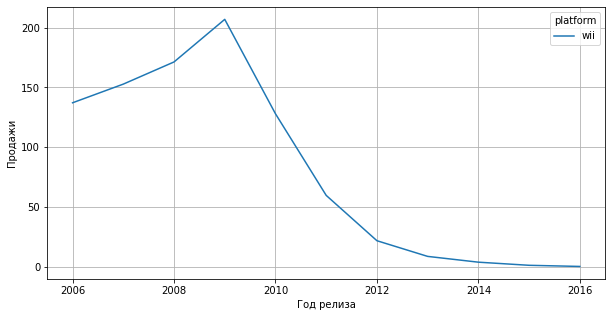

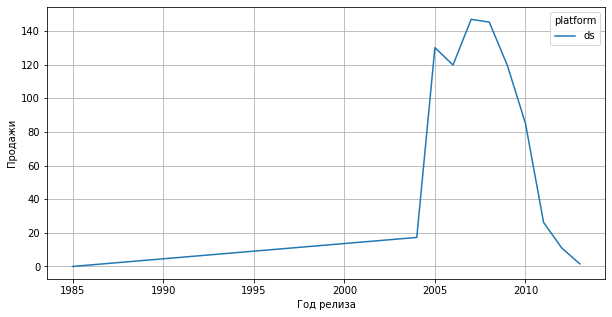

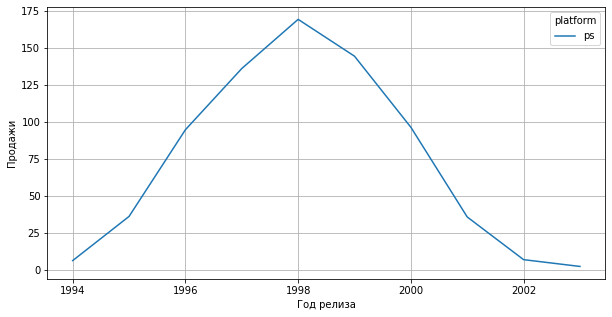

In [24]:
for i in top_platforms_filter:
    pl_for_cycle = games_filtered.loc[games_filtered['platform'] == i]
    pl_for_cycle.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize = (10,5),grid=True)
    plt.xlabel('Год релиза')
    plt.ylabel('Продажи')

    

Посмотрим, сколько "живут" консоли.

<b> PS </b> - прожила с 1994 года до 2003, почти 10 лет;
<br>
<b>PS2 </b> - с 2000 до 2011 года - 11 лет;
<br>
<b>PS3 </b> - Живет с 2006, и начала сильно сдавать позиции с выходом PS4 в 2013 году;
<br>
<b>DS </b> - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни;
<br>
<b> Wii </b> - с 2006 по 2016 уже почти изжила себя - опять 10 лет.
<br>

Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

P.S. графики без subplot для более детального визуального анализа

#### Прогноз на 2017 год

In [25]:
platform2017 = games_filtered.query('year_of_release >= 2013')
platform2017_grouped = platform2017.groupby(['platform']).agg({'total_sales':'sum'})
platform2017_grouped.sort_values(by='total_sales', ascending = False)


,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43
psv,32.99
wii,13.66


In [26]:
pl17_list = platform2017['platform'].unique()
pl17_list

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

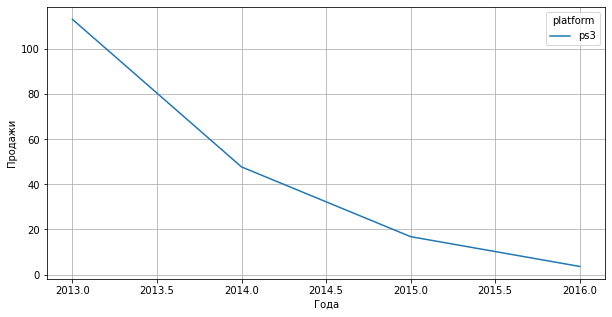

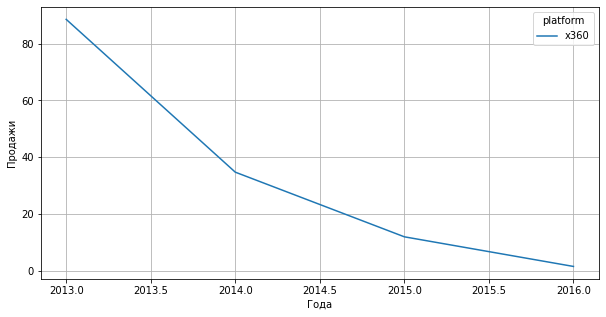

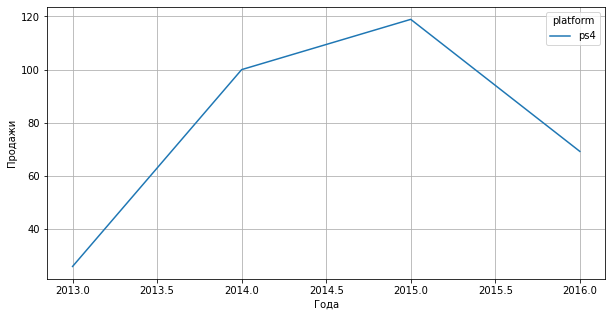

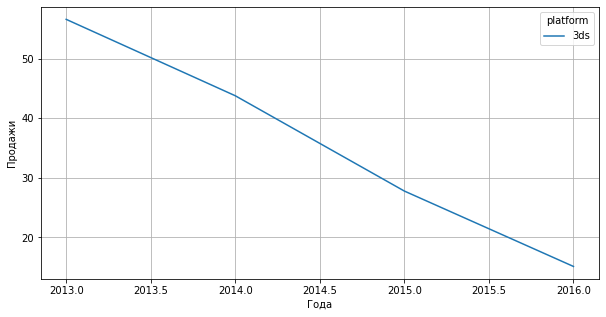

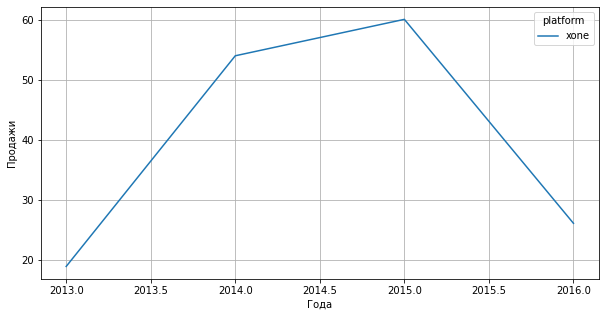

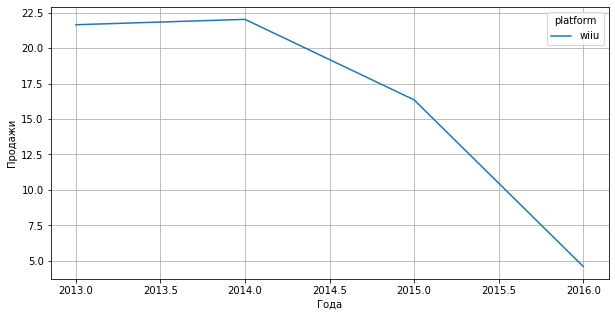

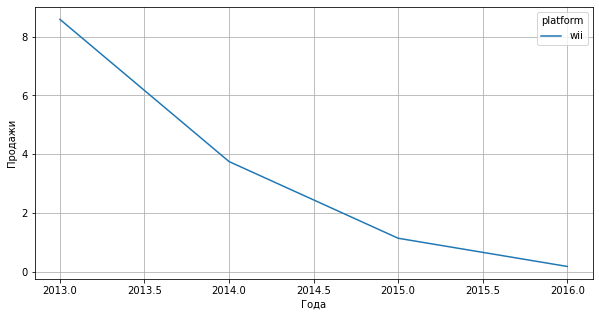

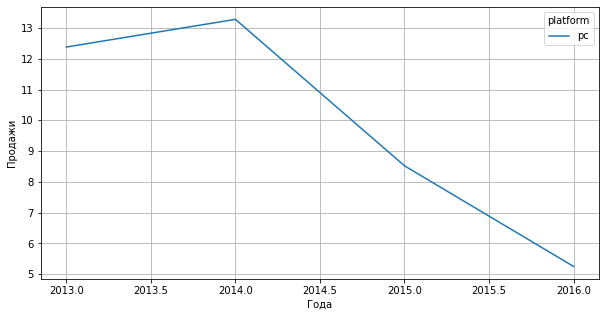

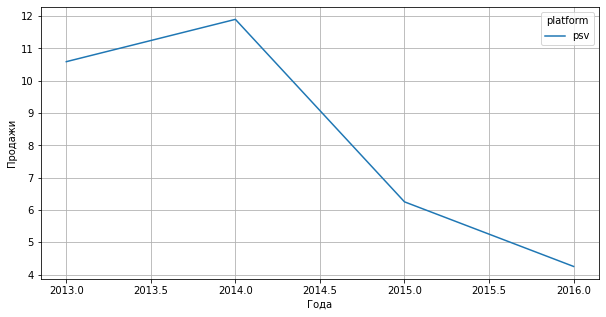

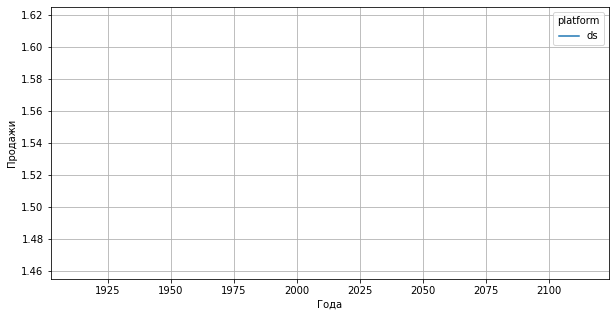

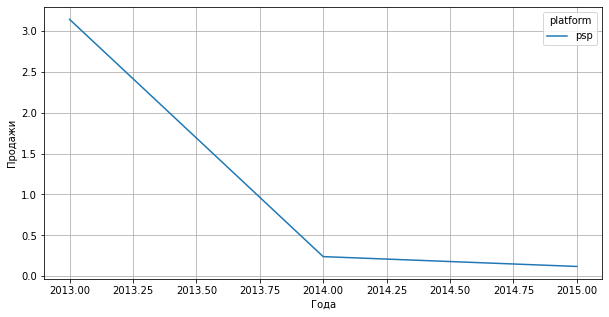

In [27]:
for platform in pl17_list:
    pl17_for_cycle = platform2017.loc[platform2017['platform'] == platform]
    pl17_for_cycle.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,5),grid=True)
    plt.xlabel('Года')
    plt.ylabel('Продажи')
    

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Судя по графику, самыми перспективными направлениями на 2017 год будут xone и ps4, несмотря на то, что они находятся даже не в топ-3 по прибыльности, судя по графику, являются перспективным направлением из-за даты выхода и средней продолжительности жизни платформы 

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

Здесь я возьму за основу топ-5 прибыльных платформ за период с 2013 по конец 2016 года.

In [28]:
top_box = platform2017_grouped.sort_values(by='total_sales', ascending = False).head()
top_box

,total_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80


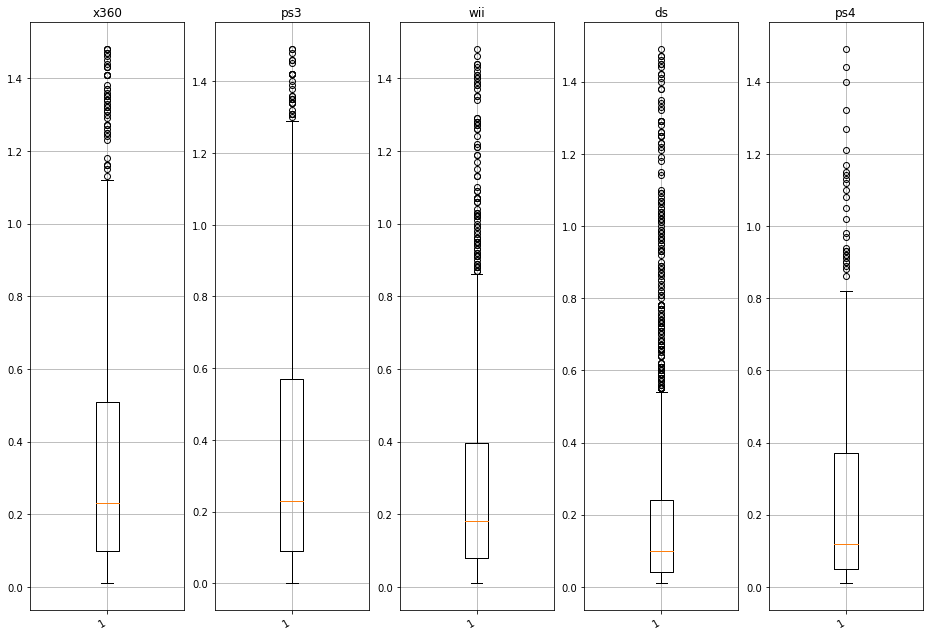

In [29]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'x360', ax2:'ps3', ax3:'wii', ax4:'ds', ax5:'ps4'}
for ax in [ax1, ax2, ax3, ax4, ax5]:
    sales = games_filtered.query('platform==@p[@ax] and total_sales < 1.5')['total_sales']
    ax.boxplot(sales)
    ax.grid()
    ax.set_title(p[ax])

fig.autofmt_xdate()


Продажи на популярных платформах схожи. Медианные значения продаж у трех: x360, ps3, wii находятся близко к уровню 0,2, а в других к уровню 0,1. 

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

В качестве одной платформы выбрана ps4, которая принесла наибольшую выручку за последние 3 года выборки
    

In [30]:
pl_ps4 = platform2017.query('platform == "ps4" and critic_score != -1 and user_score != -1')[['total_sales', 'critic_score', 'user_score']].reset_index(drop=True)
pl_ps4

,total_sales,critic_score,user_score
0,12.62,97.0,8.3
1,8.58,82.0,4.3
2,7.66,83.0,5.7
3,7.60,85.0,5.0
4,7.17,87.0,6.5
...,...,...,...
244,0.01,42.0,2.3
245,0.01,70.0,6.8
246,0.01,69.0,7.5
247,0.01,61.0,7.9


Text(0.5, 0, 'Оценка критиков')

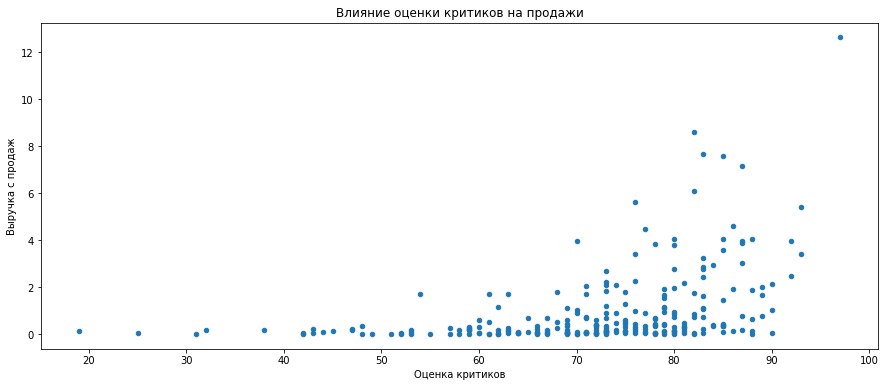

In [31]:
pl_ps4.plot(kind='scatter', x = 'critic_score', y = 'total_sales', figsize = (15, 6))
plt.title('Влияние оценки критиков на продажи')
plt.ylabel('Выручка с продаж')
plt.xlabel('Оценка критиков')

На диаграмме рассеяния прослеживается прямая корреляция между оценкой критиков и выручкой с продаж: чем выше оценка критиков, тем больше выручки она приносит. И хотя степень корреляции не особо высокая, но визуально проглядывается.

Text(0.5, 0, 'Оценка пользователей')

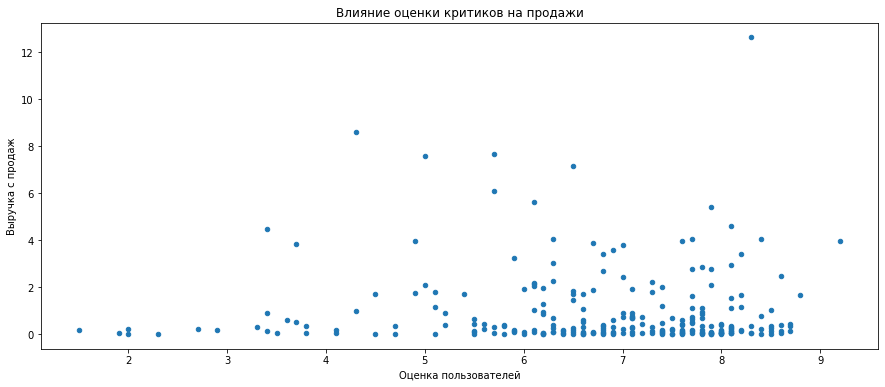

In [32]:
pl_ps4.plot(kind='scatter', x = 'user_score', y = 'total_sales', figsize = (15, 6))
plt.title('Влияние оценки критиков на продажи')
plt.ylabel('Выручка с продаж')
plt.xlabel('Оценка пользователей')

На этой диаграмме корреляция также прослеживается, однако визуально мы можем наблюдать большое количество выбросов. Попробуем взглянуть на степень корреляции этих трех характеристик через матрицу корреляции

<AxesSubplot:>

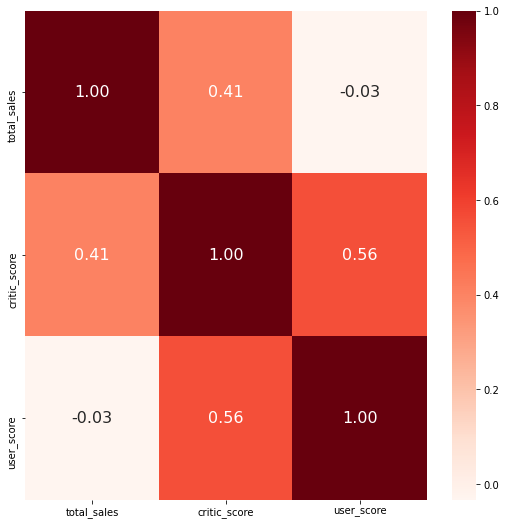

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(pl_ps4.corr(), annot=True, cmap="Reds", fmt='.2f', annot_kws={'size':16})

Матрица корреляции для ps4 описывает степень корреляции между продажами и оценками критиков чуть ниже 0.5, а вот отрицательная корреляции оценки пользователей и продаж описана описана ниже, в описании выводов соотношения продаж игр на других платформах. Оценки критиков и оценки пользователей оказывают влияние друг на друга


#### Соотнесите выводы с продажами игр на других платформах.

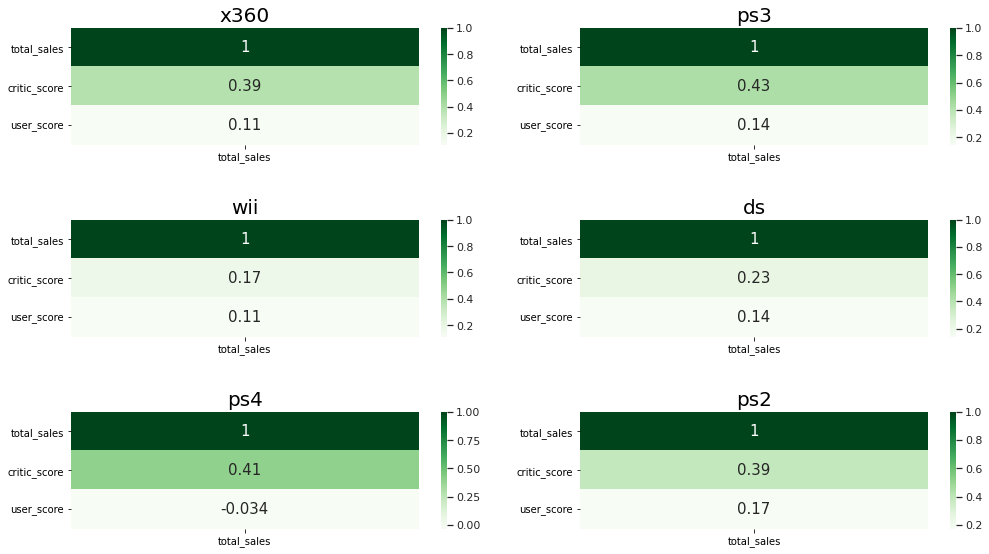

In [34]:
top_pl = ['x360', 'ps3','wii','ds','ps4', 'ps2']

rows = len(top_pl)//2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_pl = top_pl[count]
        pl_prep = games_filtered[(games_filtered['platform'] == curr_pl) & 
                               (games_filtered['user_score'] > 0) & 
                               (games_filtered['critic_score'] > 0)].copy()
        
        pl_filtered = pl_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(pl_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_pl, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Как видно из матрицы корреляции, вывод о том, что оценка критиков явно коррелирует с выручкой с продаж подтверждается только на приставках x360, ps3, ps2, ps4. Приставки wii и ds зависимость не такая большая. При этом обратная корреляция в отзывах пользователей и выручкой с продаж ps4, возможно, связана с тем, что на тот год это была довольно новая приставка, а, следовательно, отзывов от пользователей мало. 

P.S здесь уже можно было использовать subplots в отличие от графиков, построенных циклами

#### Посмотрите на общее распределение игр по жанрам.

In [35]:
genres_count = games.groupby('genre')['name'].count().sort_values(ascending=False)
genres_count

genre
action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: name, dtype: int64

В топ-3 по количеству выпущенных игр попадают жанры Action, sports, misc. Количество игр в жанре Puzzle и Strategy замыкают список жанров по количеству игр. 

In [36]:
genres_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genres_sales

genre
action          1744.17
sports          1331.27
shooter         1052.45
role-playing     934.56
platform         827.77
misc             802.51
racing           728.67
fighting         447.53
simulation       389.97
puzzle           242.57
adventure        237.59
strategy         174.23
Name: total_sales, dtype: float64

По выручке наблюдается примерно такая же картина, однако вместо жанра misc, топ-3 жанров по выручке замыкают shooter. По общему топу, strategy, adventure приносят наименьшую прибыль

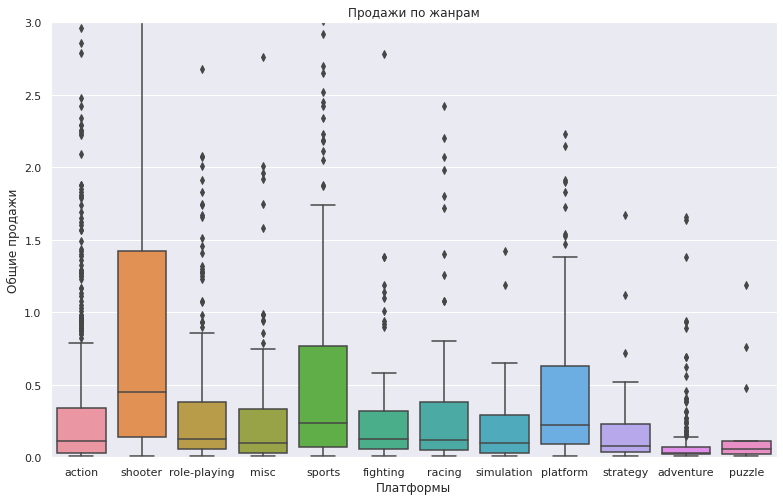

In [39]:
# Код ревьюера

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 8))
(sns.boxplot(data = platform2017, y = 'total_sales', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

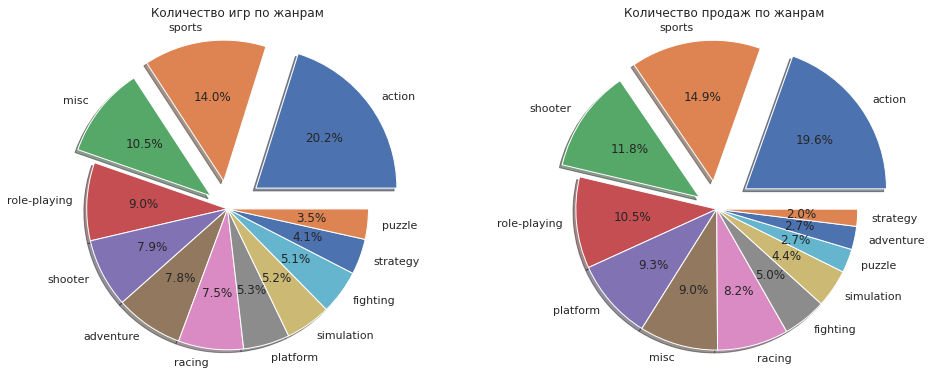

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.autofmt_xdate();

labels1 = genres_count.index
sizes1 = genres_count.values

labels2 = genres_sales.index
sizes2 = genres_sales.values
explode = (0.25, 0.2, 0.15, 0,0,0,0,0,0,0,0,0)
ax1.set_title('Количество игр по жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0)  
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.set_title('Количество продаж по жанрам')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0) 
ax2.axis('equal')

plt.show()

Визуальное представление данных с помощью "пирога". Стоит отметить, что продажи самого популярного жанра Action приносят почти в 10 раз больше выручки, чем strategy. 

### Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж

In [41]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

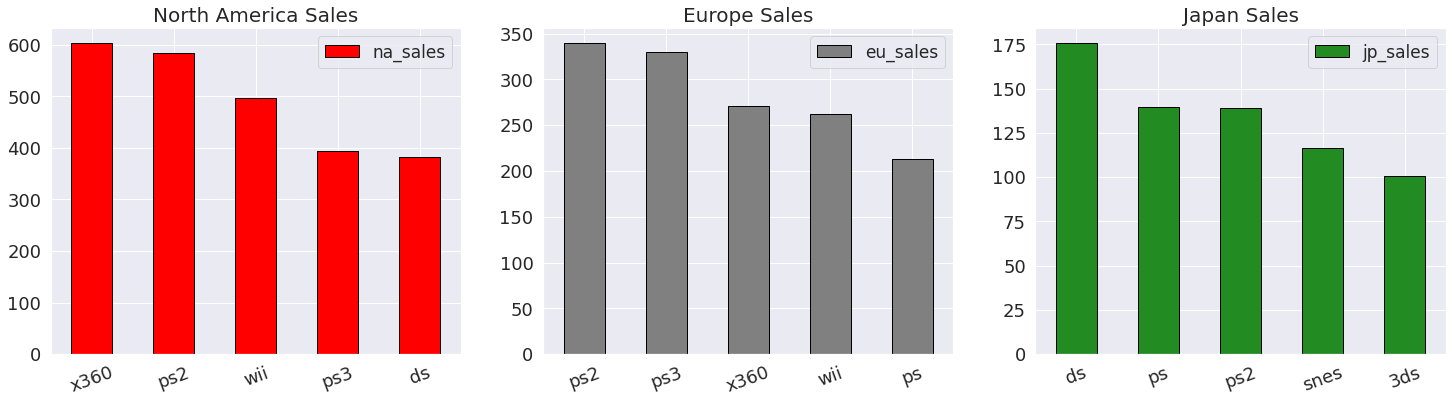

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

<b> В Северной Америке </b> особой популярностью пользуются приставки x360 и ps2 
<br>
<b> В Европе </b>, примерно, одинаковой популярны ps2 и ps3.
<br>
<b> В Японии </b> DS в лидерах, а следом за ним почти одинаково по популярности идут ps и ps2

#### Самые популярные жанры (топ-5). Поясните разницу.

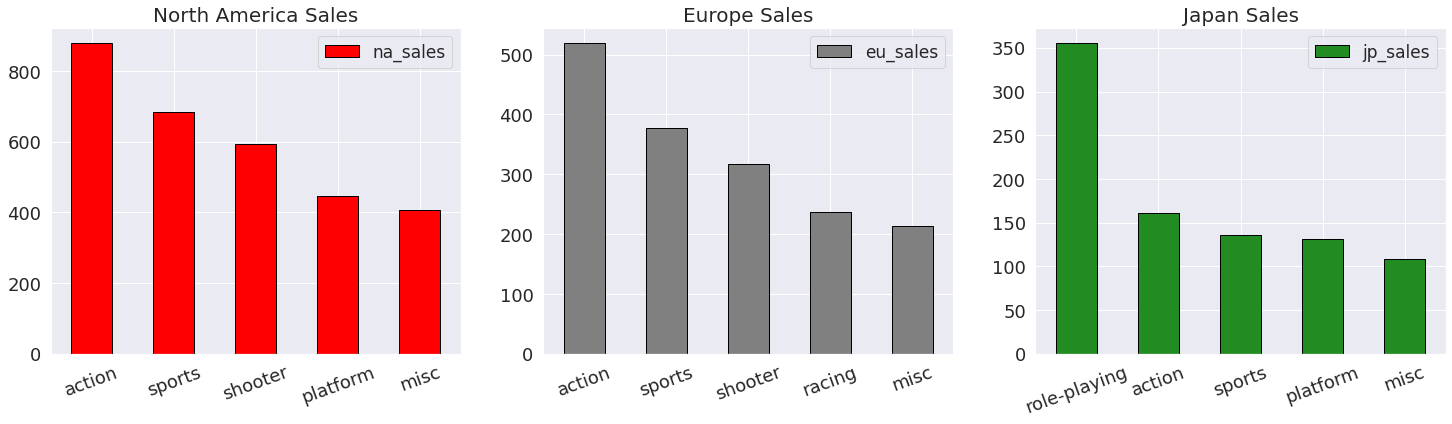

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Вкусы у <b> североамериканцев </b> и <b> европейцев </b> примерно схожи с одним лишь различием. В Северной Америке популярнее жанр platform, а в Европе на этой же позиции стоят racing.
<br>
<b> Японцы </b> выделились в данном сравнении, потому что для них на первом месте по популярности жанр - role-playing. Этот жанр занимает львиную долю интересов японцев. В остальном, предпочтения у них ближе к североамериканцам

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

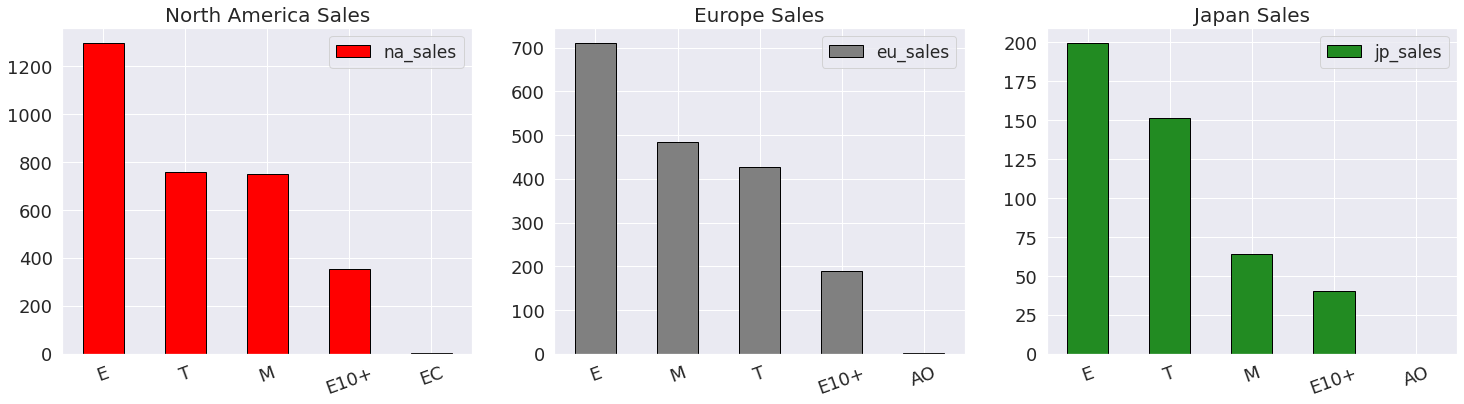

In [44]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

<b>«E»</b> («Everyone») — «Для всех»
<br>

<b>«E10+»</b> («Everyone 10 and older») — «Для всех от 10 лет и старше»
<br>

<b>«T»</b> («Teen») — «Подросткам»
<br>

<b>«M»</b> («Mature») — «Для взрослых»
<br>

<b>«AO» («Adults Only 18+»)</b> — «Только для взрослых»
<br>

<b>«EC» («Early childhood»)</b> — «Для детей младшего возраста»

<b>Северная Америка</b>: львинную долю игрового рынка этого сегмента занимает именно категория "Для всех". Второе и третье по популярности места занимают игры для подростков и взрослых 
<br>

<b>Европа</b>: в Европе интересы с Северной Америкой довольно схожи, однако игры "Для Взрослых" слегка ушли в отрыв от подростковых. Помимо этого, если в Северной Америке категория "Для детей младшего возраста" занимала последнюю строчку по популярности, то топ-5 категорий в Европе замыкает жанр "Только для взрослых".
<br>

<b>Япония</b>: в Японии также на первом месте по популярности категория "Для всех", однако по всем остальным показателям, для японцев куда более интересна категория игр "Для подростков". В отличие от Европы и Северной Америки, игры "Для Взрослых" пользуются меньшей популярностью в Японии. А вот категория "Только для взрослых" стоит на последней строчке, также как и у Европы

### Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Т.к. H0 всегда идет со знаком равенства, то нулевая гипотеза у нас будет заключаться в том, что рейтинги платформ Xbox One и PC равны.

Т.к. H0 всегда идет со знаком равенства, то нулевая гипотеза у нас будет заключаться в том, что рейтинги платформ Xbox One и PC равны. H1 Альтернативная гипотеза - рейтинги платформ Xbox One и PC не равны

In [45]:
xone_rating = games.query('platform == "xone" and year_of_release >= 2013')['user_score'].dropna()
pc_rating = games.query('platform == "pc" and year_of_release >= 2013')['user_score'].dropna()
print('Дисперсия xone:', np.var(xone_rating))
print('Дисперсия pc:', np.var(pc_rating))

Дисперсия xone: 12.36705305774558
Дисперсия pc: 10.16829130926572


Дисперсии выборок близки друг к другу, поэтому equal_var=True

In [46]:
alpha = 0.05
results = st.ttest_ind(xone_rating, pc_rating, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11283743267716301
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза <b> подтверждена </b>, что означает, что альтернативная гипотеза отвергнута. Средние пользовательские рейтинги платформ Xbox One и PC <b> равны. </b>

#### Средние пользовательские рейтинги жанров Action и Sports разные.

В данном случае H0 нулевой гипотезой у нас будет то, что средние пользовательские рейтинги двух жанров равны, а заданное условие задачи - альтернативная гипотеза

In [47]:
action_rating = games.query('genre == "action"')['user_score'].dropna()
sports_rating = games.query('genre == "sports"')['user_score'].dropna()
print('Дисперсия Action:', np.var(action_rating))
print('Дисперсия Sports:', np.var(sports_rating))

Дисперсия Action: 17.198931599296255
Дисперсия Sports: 17.00584700016542


Дисперсии +/- равны, а значит equal_var=True

In [48]:
results = st.ttest_ind(action_rating, sports_rating, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2025568367391132e-08
Отвергаем нулевую гипотезу


In [49]:
print("Средняя оценка пользователей Action:", action_rating.mean())
print("Средняя оценка пользователей Sports:", sports_rating.mean())

Средняя оценка пользователей Action: 3.374859008607896
Средняя оценка пользователей Sports: 2.739863713798978


Таким образом нулевая гипотеза о том, что средние оценки этих двух жанров равны, отвергается. Гипотеза, заданная в условии задачи <b> "Средние пользовательские рейтинги жанров Action и Sports разные." </b> подтверждена!

### Общий вывод

Согласно проведенному анализу: 
<br>

<b> 1 </b>. На общую выручку влияют оценки критиков, а вот пользовательские оценки оказывают куда меньшее влияние на доходность.
<br>

<b> 2 </b>. В среднем, игровые платформы живут около 10 лет. Затем им на замену приходят новые: 
<br>

<b> PS </b> - прожила с 1994 года до 2003, почти 10 лет;
<br>
<b>PS2 </b> - с 2000 до 2011 года - 11 лет;
<br>
<b>PS3 </b> - Живет с 2006, и начала сильно сдавать позиции с выходом PS4 в 2013 году;
<br>
<b>DS </b> - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни;
<br>
<b> Wii </b> - с 2006 по 2016 уже почти изжила себя - опять 10 лет.
<br>

Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.
<br>

<b> 3 </b>. Жанровые предпочтения в играх у японцев сильно отличаются от Европы и Северной Америки. Если на Западе предпочитают Action, то в Японии - Role Play. Также во всех трех регионах различается самая популярная игровая платформа: Северная Америка - x360, Европа - ps2, Япония - DS. А вот самая популярная возрастная категория у всех регионов одинаковая - E (для всех).
<br>

<b> 4 </b>. В совокупности, самый популярный и доходный жанр - Action. Последним же в строчках доходности оказался жанр Strategy
<br>

<b> 5 </b>. Гипотеза о том, что средние оценки пользователей по платформам PC и xone равны была отвергнута. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные подтверждена.
<br>

<b> 6 </b>. До 95-го года количество выпускаемых игр было крайне малым. С нарастанием вычислительных мощностей и, в целом, с развитием железа, наблюдался и рост игр, которые выпускались по годам. Пик пришелся на 2008 год, а затем начался спад. Возможно, это связано с развитием высокоскоростного интернета, который позволил создать многопользовательские онлайн игры, которые остаются популярными многие годы, и конкурировать с ними крайне сложно, и приходится придумывать что-то инновационное. А на это нужно время. Таково мое предположение о спаде выпуска игр после 2010 года
<br>

<b> 7 </b> 
Самыми перспективными направлениями на 2017 год будут xone и ps4, несмотря на то, что они находятся даже не в топ-3 по прибыльности, судя по графику, являются перспективным направлением из-за даты выхода и средней продолжительности жизни платформы 
<br>

<b> 8 </b> 
Матрица корреляции для ps4 показывает, что степень корреляции между продажами и оценками критиков чуть ниже 0.5, а вот отрицательная корреляции оценки пользователей и продаж описана описана ниже, в описании выводов соотношения продаж игр на других платформах. А вот оценки критиков и оценки пользователей по-прежнему оказывают влияние друг на друга
<br> 

<b> 9 </b> 
Оценка критиков явно коррелирует с выручкой с продаж подтверждается только на приставках x360, ps3, ps2, ps4. Приставки wii и ds зависимость не такая большая. При этом обратная корреляция в отзывах пользователей и выручкой с продаж ps4, возможно, связана с тем, что на тот год это была довольно новая приставка, а, следовательно, отзывов от пользователей мало. 